### House Price Prediction
Dataset: [House Price Dataset](https://www.kaggle.com/datasets/shree1992/housedata)

Dataset Description:

The House Price Dataset contains information about of various characteristics of houses and their surroundings that are used to predict house prices.

|     Features     |     Data Type     |     Description    |
|------------------|-------------------|--------------------|
|       date       |        String     | The sales data of the house |
|       price      |        Float      | The selling price of the house |
|     bedrooms     |        Float      | The number of bedroom in the house |
|     bathrooms    |        Float      | The number of bedrooms, if the "x.5" represents a half bathroom, a bathroom that typically has a toilet and sink but has not  shower or bathtub | 
|    sqft_living   |         Int       | The living area of the house in square feet |
|    sqft_lot      |         Int       | The total area of property, including outdoor spaces, in square feet |
|     floors       |        Float      | The number of floors or levels in the house. May contain decimals for partial floors |
|   waterfront     |         Int       | indicates whether the house is located near or facing a body of water |
|      view        |         Int       | Represents the quality or rating of the house's view |
|    condition     |         Int       | The overall condition of the hoyse, typically on a scale from 1 to 5, where 5 indicates excellent condition |
|    sqft_above    |         Int       | The square footage of the house above ground level |
|    sqft_basement |         Int       | The area of basement (if present) in square feet| 
|    yr_built      |         Int       |The year the house was built. Newer houses generally have higher prices |
|    yt_renovated  |         Int       | The year the house was last renovated. A value of 0 means it has never been renovated |
|      street      |        String     |The name of the street where the house is located |
|       city       |        String     | The city where the house is located |
|     state_zip    |        String     | The state and postal code (ZIP Code) of the house |
|     country      |        String     | The country where the house is located |

Purpose:
The goal of the House Price Prediction project is to build a model capable of predicting house prices based on historical data and various property characteristics, such as building size, number of rooms, and location. This project performing EDA(Exploratory Data Analysis), preprocessing and modeling with various model of machine learning.


# Preparation

##  Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore", category=FutureWarning)

## Import Dataset

In [ ]:
House_df=pd.read_csv('./Dataset/data.csv')
House_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# EDA (Exploratory Data Analysis)

## Data Understanding

In [4]:
House_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
House_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
House_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
House_df.duplicated().sum()

0

In [8]:
row, column=House_df.shape
print("Row of Dataframe", row)
print("Column of Dataframe", column)

Row of Dataframe 4600
Column of Dataframe 18


## Data Visualization

### Visualization of The Houses Sold Based On The Number of Rooms

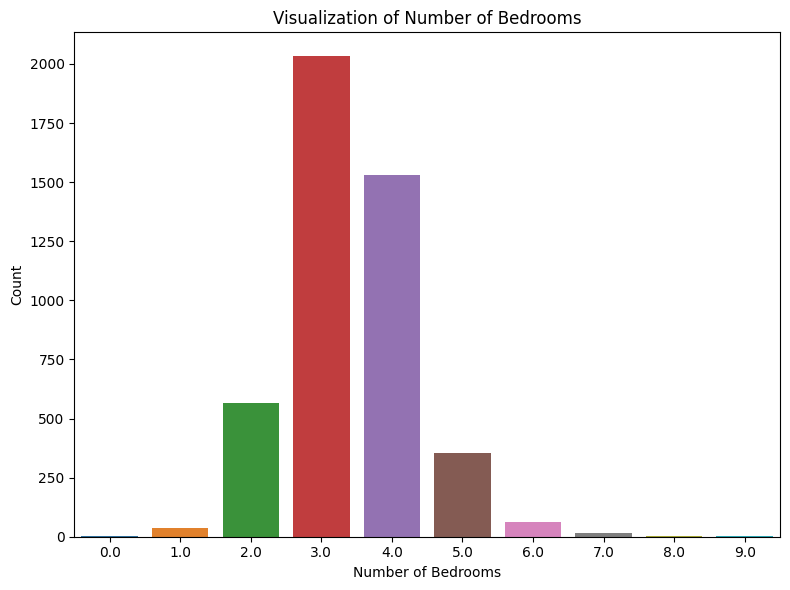

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(data=House_df, x='bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Visualization of Number of Bedrooms')
plt.tight_layout()
plt.show()

### Visualization of The Houses Sold Based on Quality View

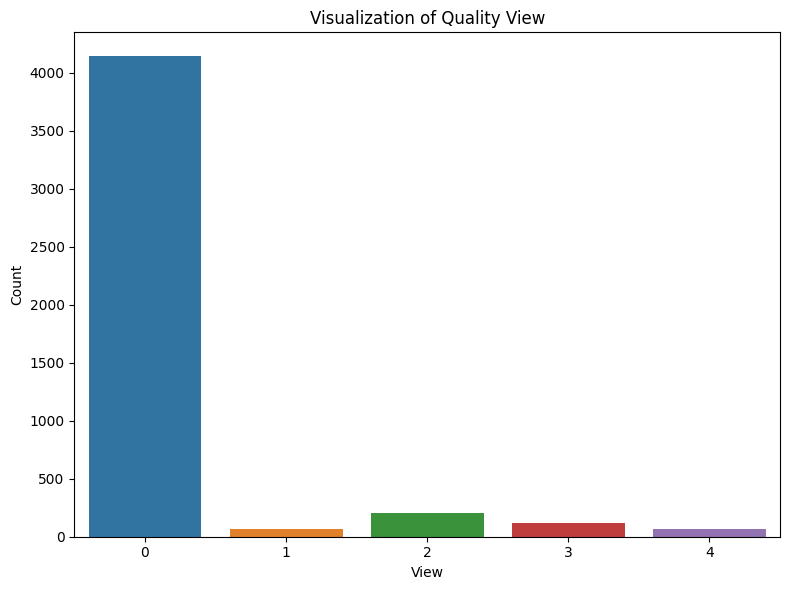

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=House_df, x='view')
plt.xlabel('View')
plt.ylabel('Count')
plt.title('Visualization of Quality View')
plt.tight_layout()
plt.show()

### Visualization of The Houses Sold Based on House Condition

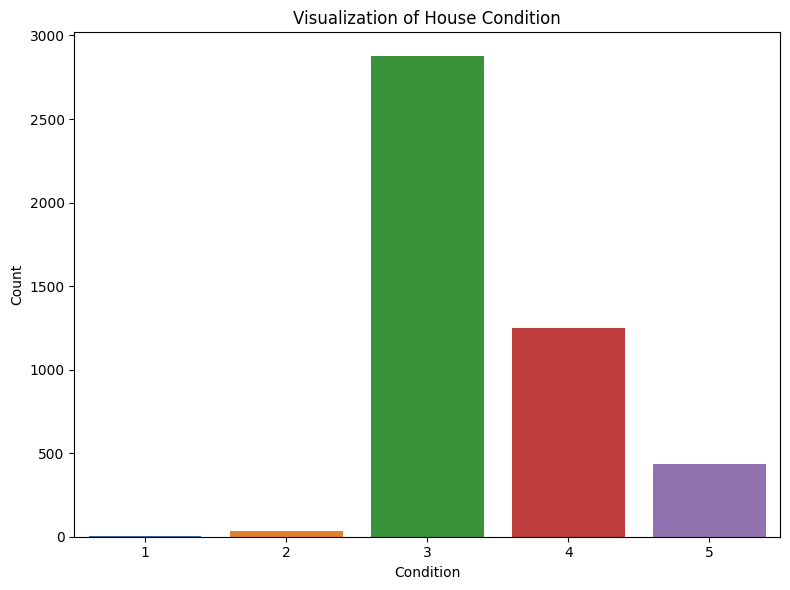

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(data=House_df, x='condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Visualization of House Condition')
plt.tight_layout()
plt.show()

### Visualization of The Houses Sold Based on Number of Bathrooms

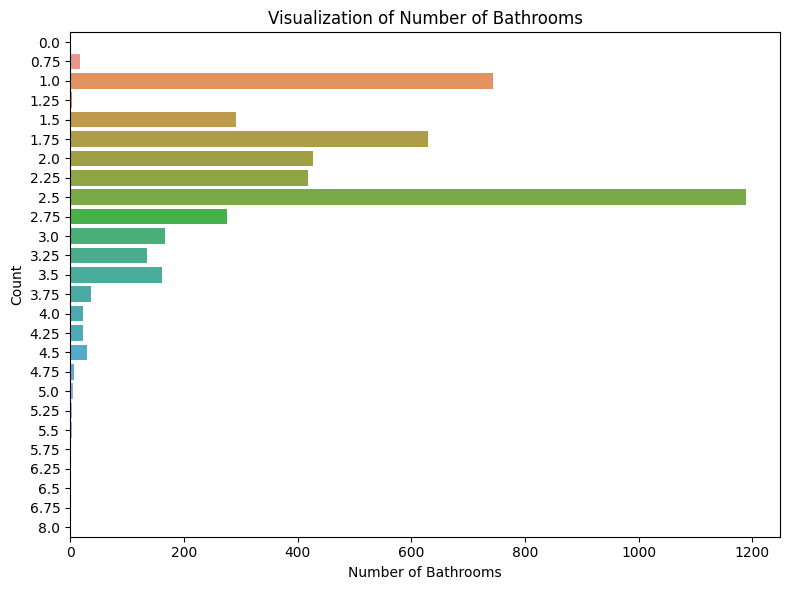

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(data=House_df, y='bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Visualization of Number of Bathrooms')
plt.tight_layout()
plt.show()

### Visualization of The Houses Sold Based on Waterfront View

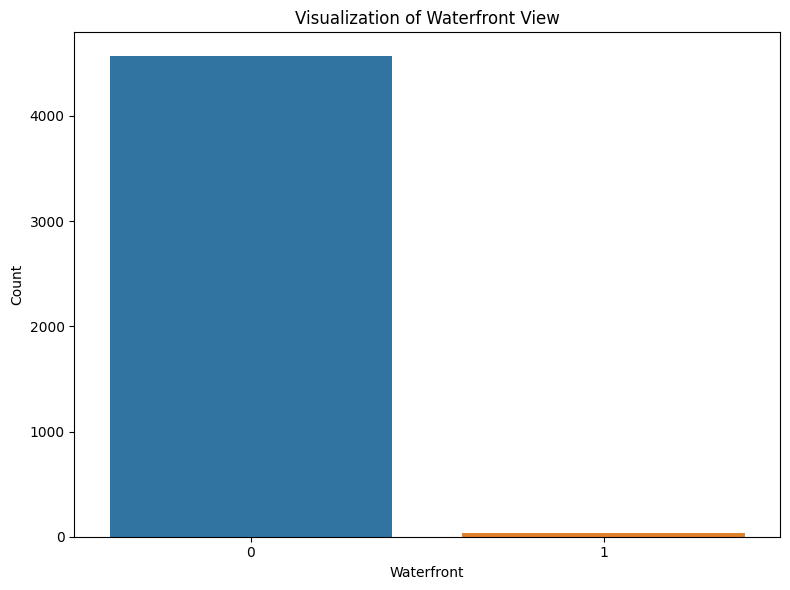

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data=House_df, x='waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.title('Visualization of Waterfront View')
plt.tight_layout()
plt.show()

### Visualization of The Houses Sold Based on Number of Floors

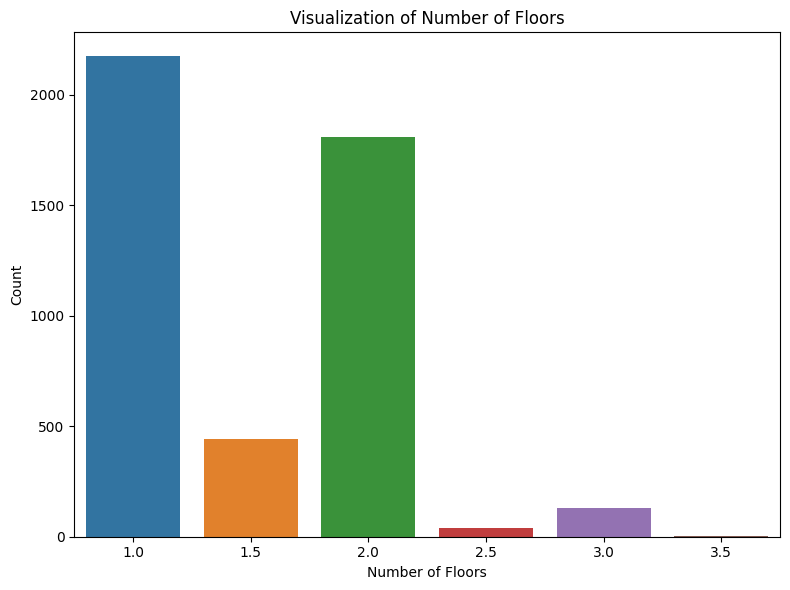

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data=House_df, x='floors')
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.title('Visualization of Number of Floors')
plt.tight_layout()
plt.show()

### Visualization of The Houses Sold Based on City

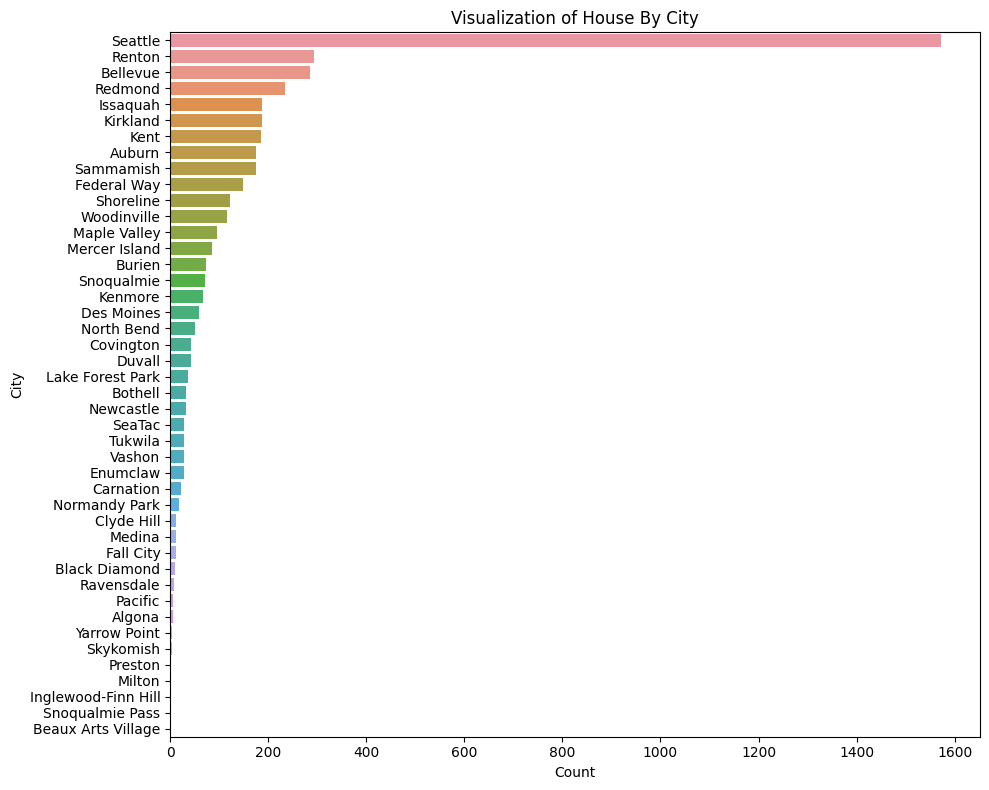

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data=House_df, y='city', order=House_df['city'].value_counts().index)
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Visualization of House By City')
plt.tight_layout()
plt.show()

### Boxplot Visualization of Numerical Feature

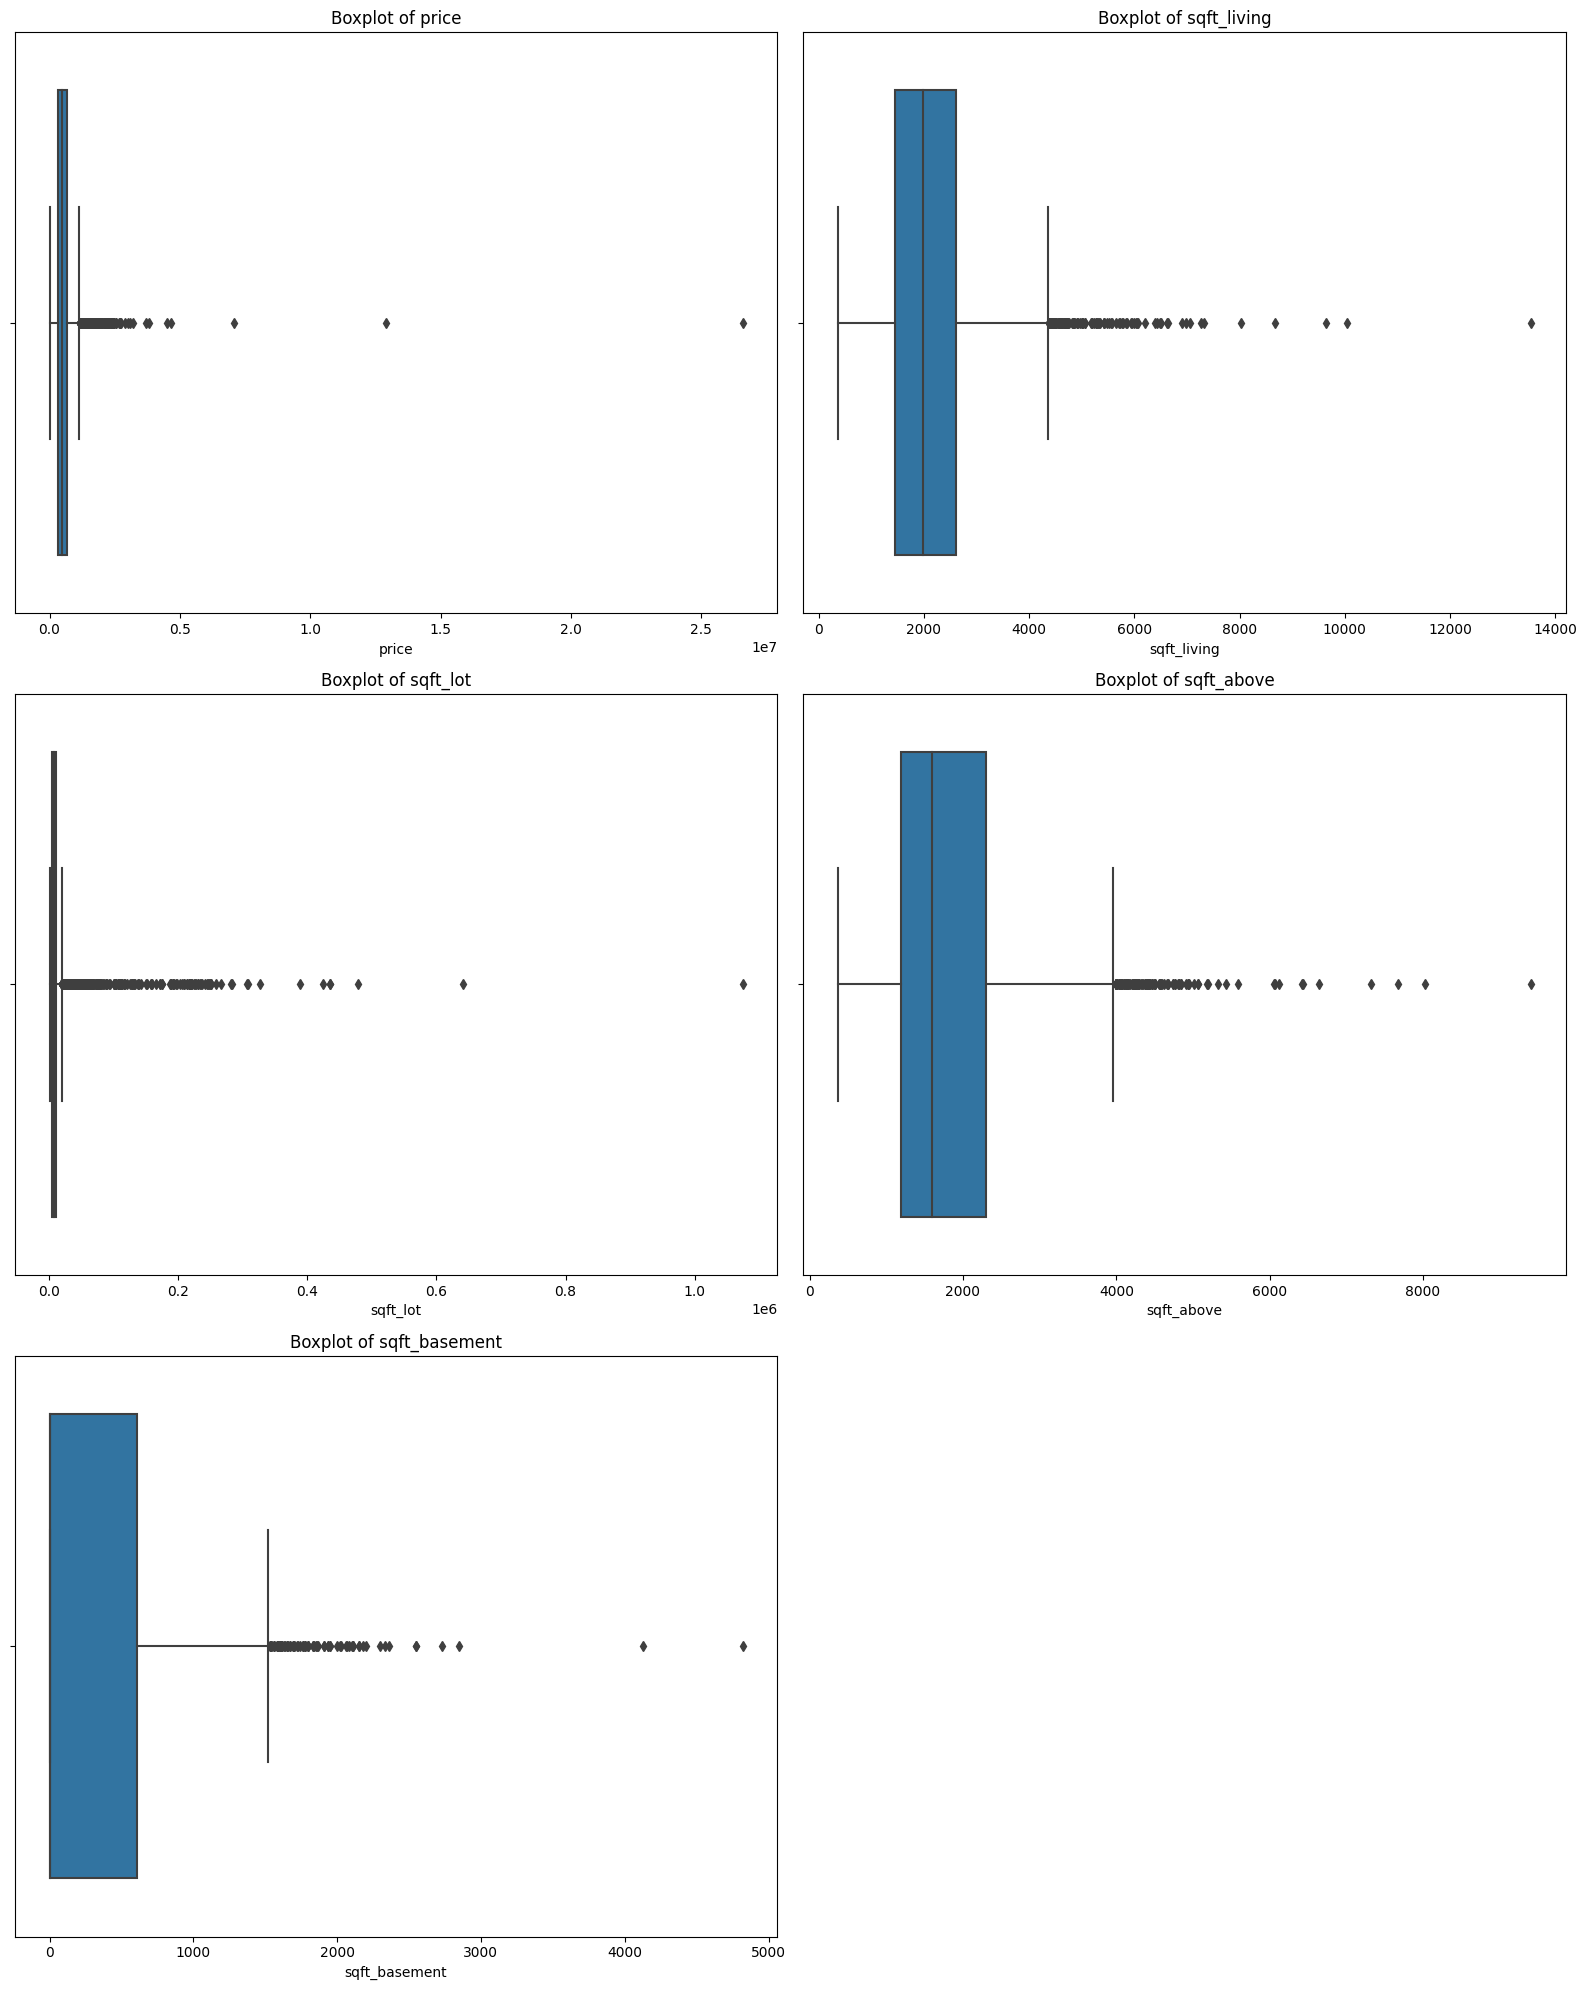

In [16]:
num_columns=['price','sqft_living','sqft_lot','sqft_above', 'sqft_basement']
fig, axes=plt.subplots(3,2, figsize=(16,20))
axes=axes.flatten()
for i, feature in enumerate(num_columns):
    sns.boxplot(x=House_df[feature], ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_title(f'Boxplot of {feature}')
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Visualization of the Distribution of Numerical Columns

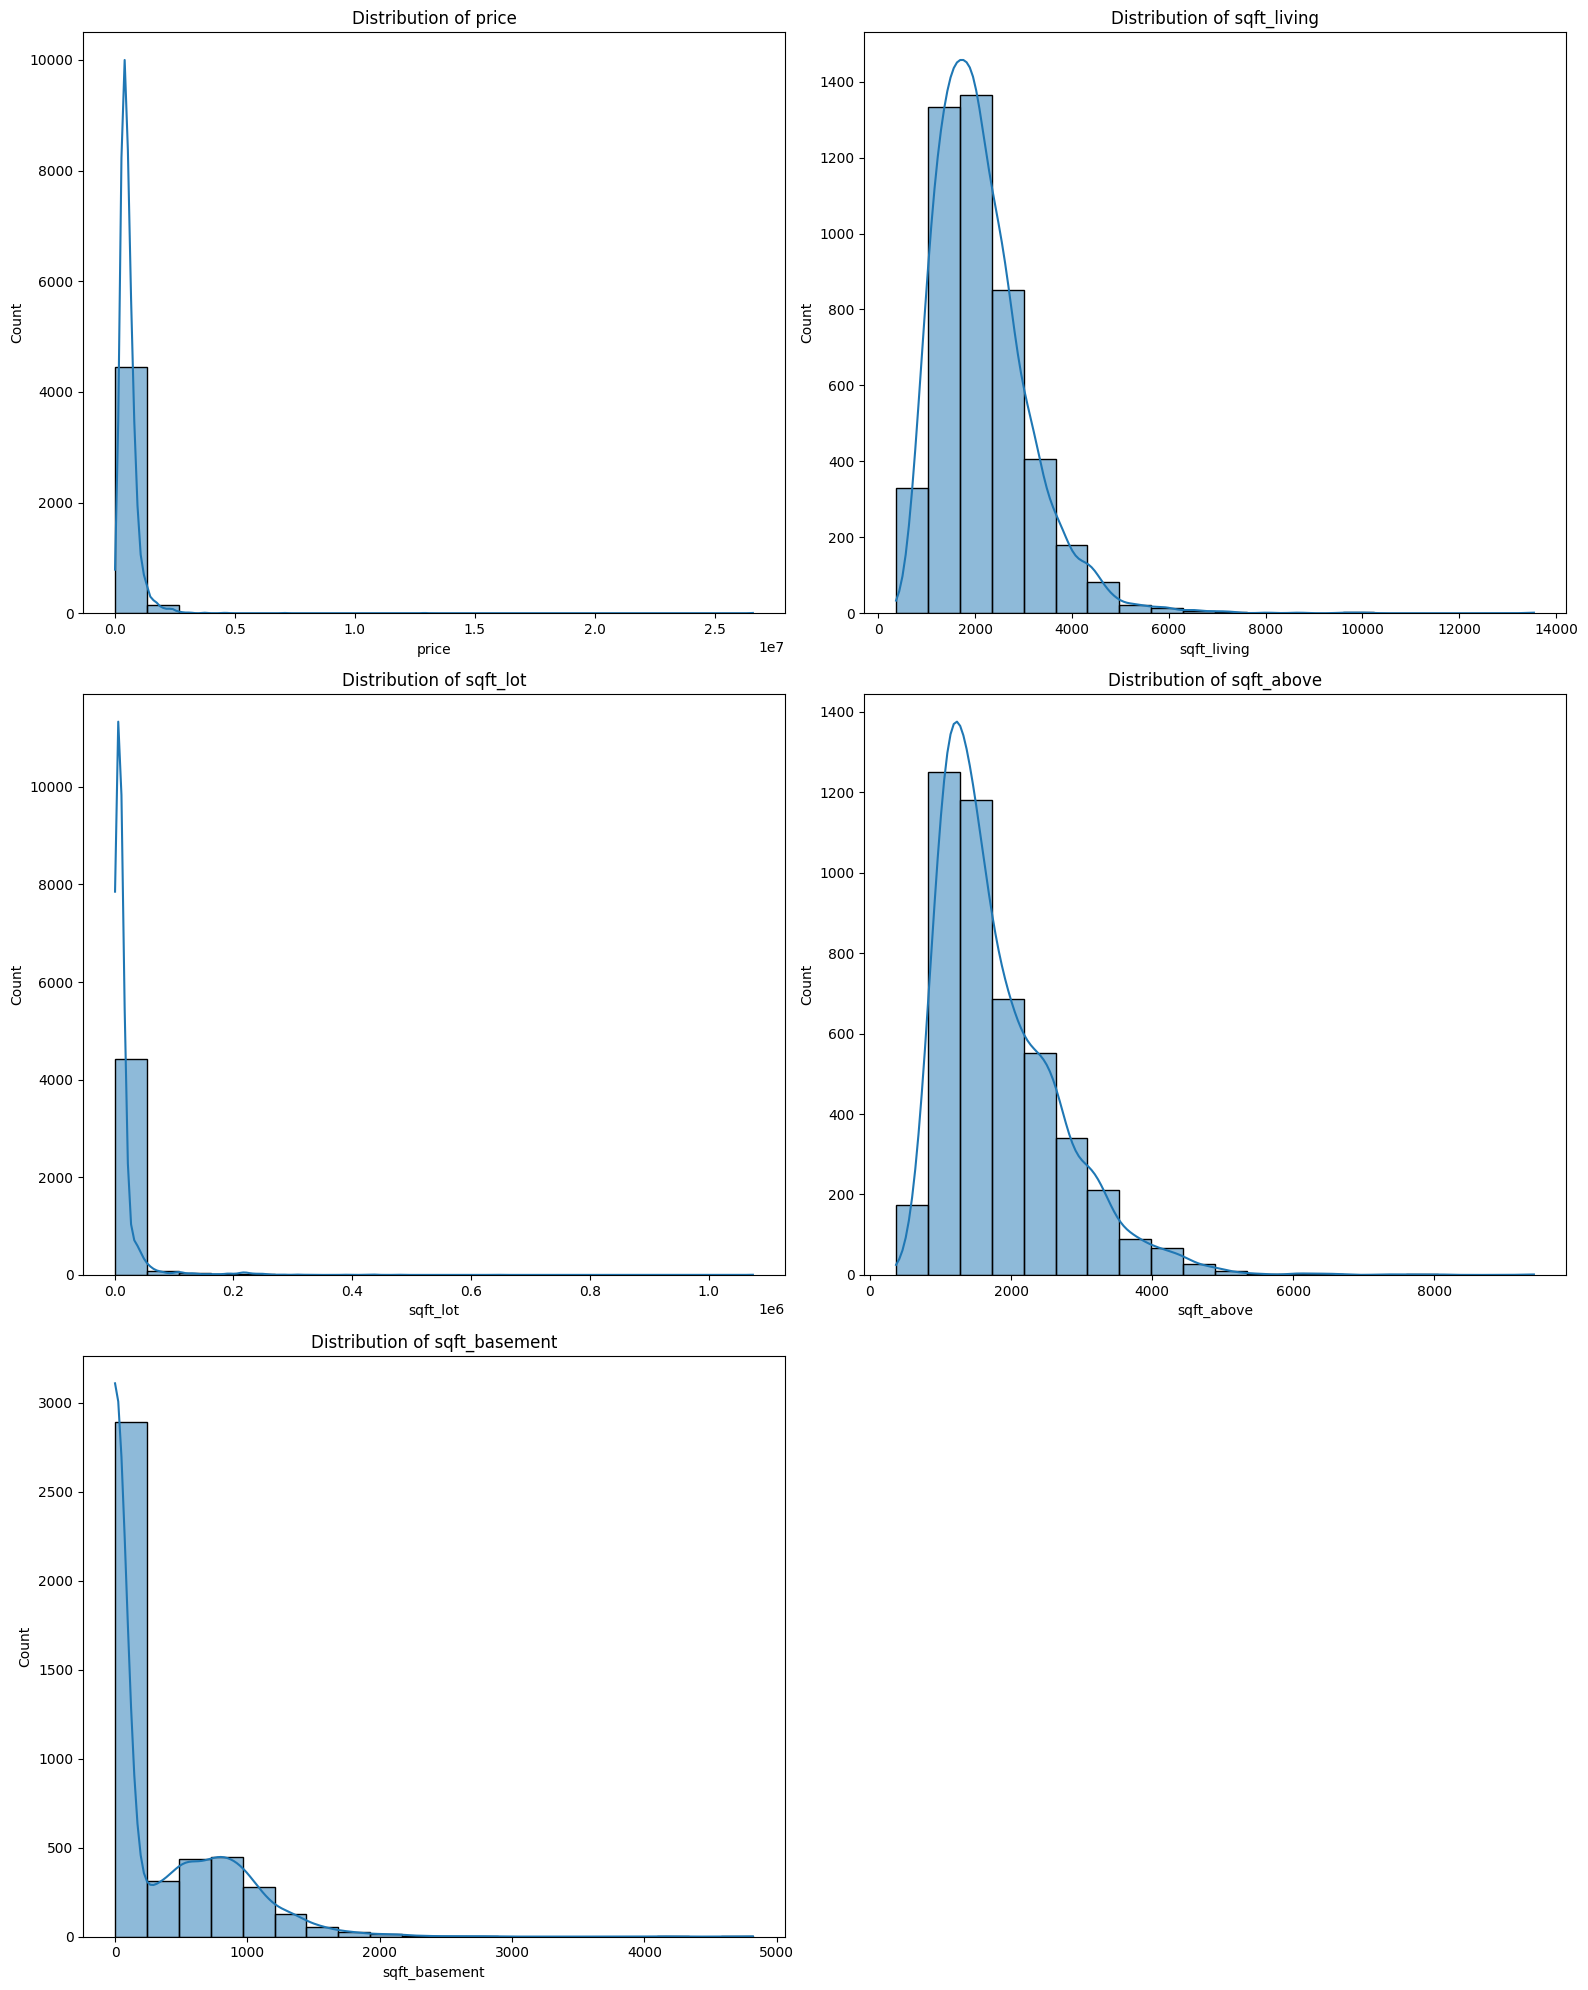

In [17]:
fig, axes=plt.subplots(3,2, figsize=(16,20))
axes=axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(House_df[col], bins=20, kde=True, edgecolor='black',ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    plt.ylabel('Count')
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Heatmap Visualization of Numeric Columns

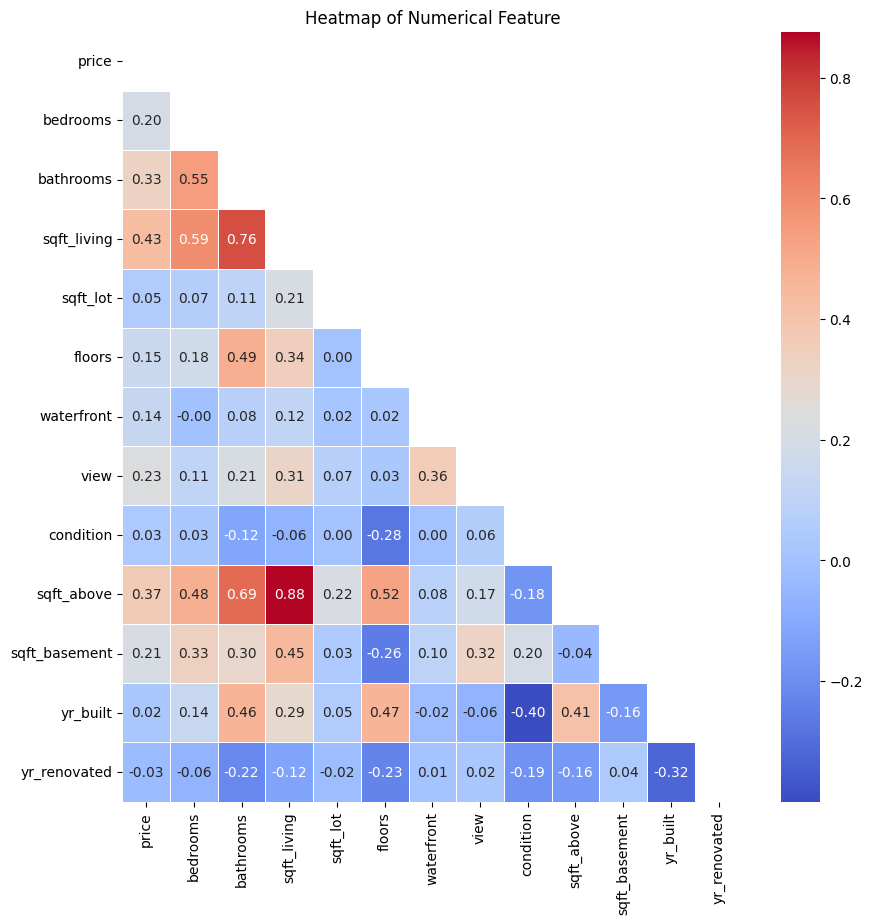

In [18]:
num_column=House_df.select_dtypes(include='number').columns
corr_num=House_df[num_column].corr()
mask=np.triu(np.ones_like(corr_num,dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(corr_num, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask, fmt='.2f')
plt.title('Heatmap of Numerical Feature')
plt.show()

### Visualization of Waterfront View Comparisons Based on Price

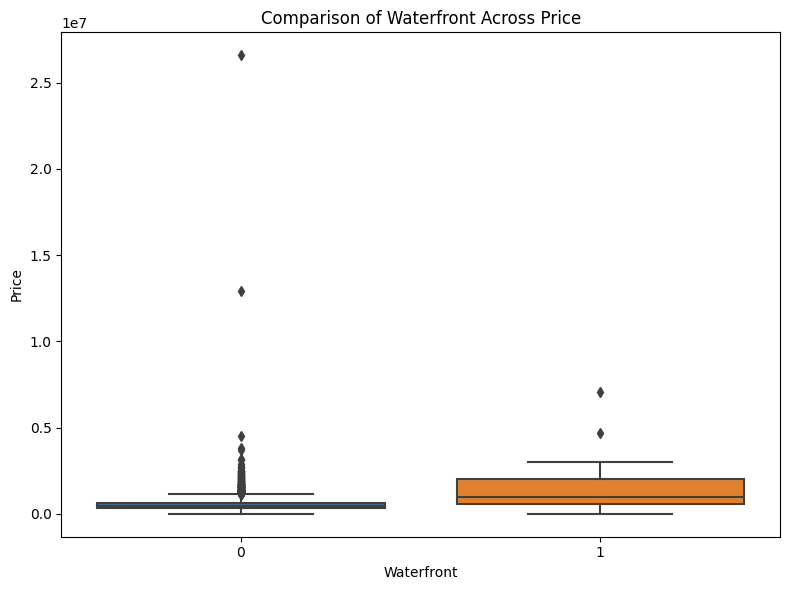

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=House_df, x='waterfront', y='price')
plt.title('Comparison of Waterfront Across Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Visualization of House Condition Comparisons Based on Price

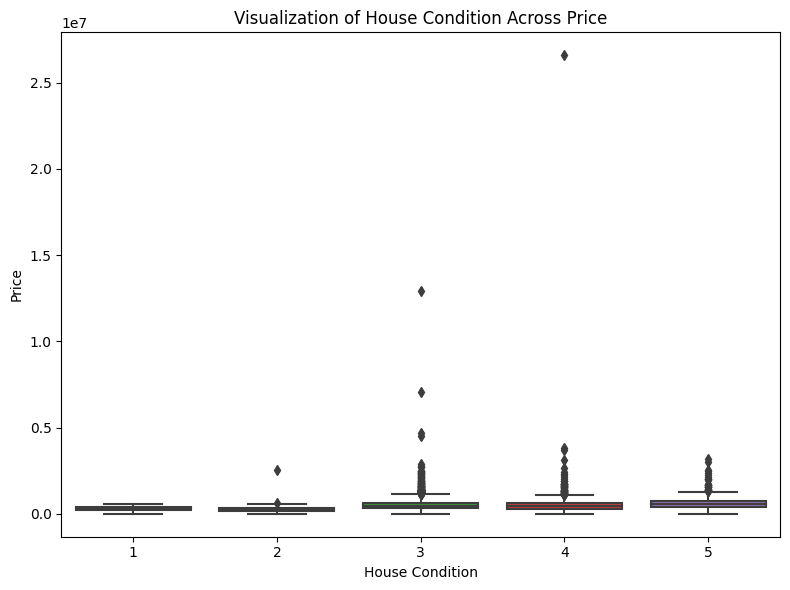

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=House_df, x='condition', y='price')
plt.title('Visualization of House Condition Across Price')
plt.xlabel('House Condition')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Visualization of Number of House Floors Comparisons Based on Price

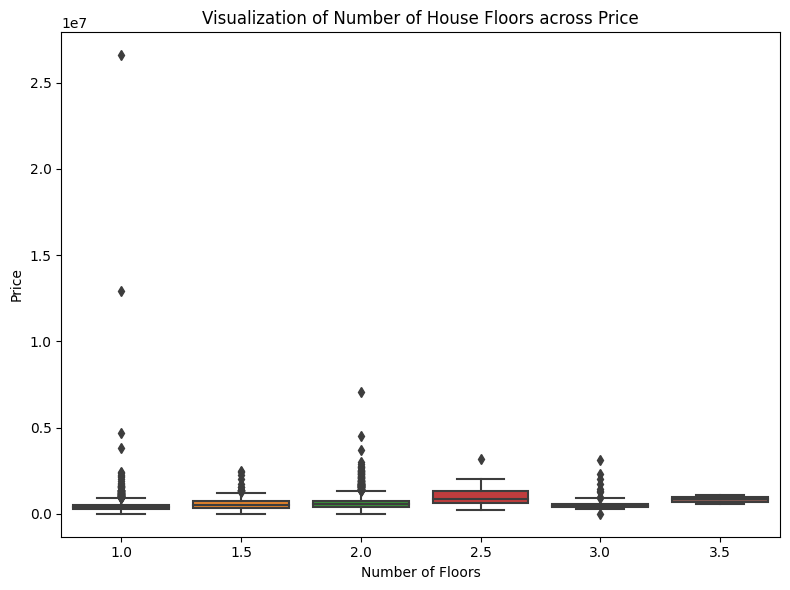

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(data=House_df, x='floors', y='price')
plt.title('Visualization of Number of House Floors across Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Preprocessing

## Drop Columns

In [4]:
House_df=House_df.drop(columns=['date','country'], axis=1)

## Outlier Handling

In [5]:
def outlier_handling(df, columns):
    df_cleaned=df.copy()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            Q1=df_cleaned[col].quantile(0.25)
            Q3=df_cleaned[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1 - 1.5 * IQR
            upper_bound=Q3 + 1.5 * IQR
            df_cleaned=df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    df_cleaned=df_cleaned.reset_index(drop=True)
    return df_cleaned
House_df=outlier_handling(House_df, columns=['price','sqft_living','sqft_lot','sqft_above', 'sqft_basement'])

## Encoding

In [6]:
House_df=pd.get_dummies(House_df, drop_first=True, dtype=int)

## Training and Test Data Split

In [7]:
X=House_df.drop(columns='price', axis=1)
y=House_df['price']

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Training Data Shape: X_train{X_train.shape}, y_train{y_train.shape}")
print(f'Testing Data Shape: X_test {X_test.shape}, y_test{y_test.shape}')

Training Data Shape: X_train(2952, 3754), y_train(2952,)
Testing Data Shape: X_test (738, 3754), y_test(738,)


# Modeling

## Linear Regression

In [12]:
LR=LinearRegression().fit(X_train, y_train)
eval_lr=LR.predict(X_test)
mae_lr=mean_absolute_error(y_test, eval_lr)
mse_lr=mean_squared_error(y_test, eval_lr)
r2_lr=r2_score(y_test, eval_lr)

In [13]:
Metrics_df=({
    "MAE":[mae_lr],
    "MSE":[mse_lr],
    "R2 Score":[r2_lr]
})
Metrics_df=pd.DataFrame(Metrics_df, index=['Linear Regression'])
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,103673.23144,2.228953e+10,0.48546


## Random Forest 

In [14]:
RF=RandomForestRegressor().fit(X_train, y_train)
eval_rf=RF.predict(X_test)

mae_rf=mean_absolute_error(y_test, eval_rf)
mse_rf=mean_squared_error(y_test, eval_rf)
r2_rf=r2_score(y_test, eval_rf)

In [15]:
Metrics_df.loc['Random Forest']=[mae_rf, mse_rf, r2_rf]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,103673.231440,2.228953e+10,0.485460
Random Forest,75147.222672,1.303552e+10,0.699083


## Decision Tree

In [16]:
Dt=DecisionTreeRegressor().fit(X_train, y_train)
eval_dt=Dt.predict(X_test)

mae_dt=mean_absolute_error(y_test, eval_dt)
mse_dt=mean_squared_error(y_test, eval_dt)
r2_dt=r2_score(y_test, eval_dt)

In [17]:
Metrics_df.loc['Decision Tree']=[mae_dt, mse_dt, r2_dt]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,103673.231440,2.228953e+10,0.485460
Random Forest,75147.222672,1.303552e+10,0.699083
Decision Tree,96835.269135,2.158672e+10,0.501684


## SVM

In [18]:
SVM=SVR().fit(X_train, y_train)
eval_svm=SVM.predict(X_test)
mae_svm=mean_absolute_error(y_test, eval_svm)
mse_svm=mean_squared_error(y_test, eval_svm)
r2_svm=r2_score(y_test, eval_svm)

In [20]:
Metrics_df.loc['SVM']=[mae_svm, mse_svm, r2_svm]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,103673.231440,2.228953e+10,0.485460
Random Forest,75147.222672,1.303552e+10,0.699083
Decision Tree,96835.269135,2.158672e+10,0.501684
SVM,165826.203831,4.564509e+10,-0.053689


## XGB Regressor

In [21]:
XGB=xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
).fit(X_train, y_train)
eval_xgb=XGB.predict(X_test)

mae_xgb=mean_absolute_error(y_test, eval_xgb)
mse_xgb=mean_squared_error(y_test, eval_xgb)
r2_xgb=r2_score(y_test, eval_xgb)

In [22]:
Metrics_df.loc['XGB Regressor']=[mae_xgb, mse_xgb, r2_xgb]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,103673.231440,2.228953e+10,0.485460
Random Forest,75147.222672,1.303552e+10,0.699083
Decision Tree,96835.269135,2.158672e+10,0.501684
SVM,165826.203831,4.564509e+10,-0.053689
XGB Regressor,74548.188969,1.234265e+10,0.715077


# Hypertune Parameter

## Random Forest Hypertune Parameter

In [38]:
rf_parameter={
    'n_estimators':[100,150,300],
    'max_depth':[None, 3, 5,7],
    'min_samples_leaf':[2,3,5,7],
    'min_samples_split':[2,3,5,7]
}
rf_grid=GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_parameter,
    n_jobs=-1,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=0
)
rf_grid.fit(X_train, y_train)
print("Best Parameters:",rf_grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 150}


## Decision Tree Hypertune Parameter

In [39]:
dt_parameter={
    'max_depth':[None, 3,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,5,10],
    'max_features':[None, 'sqrt','log2']
}
dt_grid=GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_parameter,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)
dt_grid.fit(X_train, y_train)
print("Best Parameters:", dt_grid.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


## XGB Regressor Hypertune Parameter

In [11]:
xgb_params={
    'n_estimators':[100,200, 500],
    'max_depth':[3,5,7],
    'learning_rate':[0.01, 0.1, 0.2],
    'subsample':[0.7, 0.8, 1],
    'colsample_bytree':[0.7, 0.8,1]
}
xgb_grid=GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=xgb_params,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=0
)
xgb_grid.fit(X_train, y_train)
print("Best Parameters:",xgb_grid.best_params_)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.7}


## Random Forest (After Hypertune Parameter)

In [26]:
RF1=RandomForestRegressor(max_depth=None
                        ,min_samples_leaf=2,
                        min_samples_split=7,
                        n_estimators=150).fit(X_train, y_train)
eval_rf1=RF1.predict(X_test)
mae_rf1=mean_absolute_error(y_test, eval_rf1 )
mse_rf1=mean_squared_error(y_test, eval_rf1)
r2_rf1=r2_score(y_test, eval_rf1)

In [27]:
Metrics_df.loc['Random Forest (After Hypertune Parameter)']=[mae_rf1, mse_rf1, r2_rf1]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,103673.231440,2.228953e+10,0.485460
Random Forest,75147.222672,1.303552e+10,0.699083
Decision Tree,96835.269135,2.158672e+10,0.501684
SVM,165826.203831,4.564509e+10,-0.053689
XGB Regressor,74548.188969,1.234265e+10,0.715077
Random Forest (After Hypertune Parameter),75697.038238,1.302851e+10,0.699245


## Decision Tree (After Hypertune Parameter) 

In [28]:
DT1=DecisionTreeRegressor(
    max_depth=10,
    max_features=None,
    min_samples_leaf=2, 
    min_samples_split=10
).fit(X_train, y_train)
eval_dt1=DT1.predict(X_test)
mae_dt1=mean_absolute_error(y_test, eval_dt1)
mse_dt1=mean_squared_error(y_test, eval_dt1)
r2_dt1=r2_score(y_test, eval_dt1)

In [29]:
Metrics_df.loc['Decision Tree (After Hypertune Parameter)']=[mae_dt1, mse_dt1, r2_dt1]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,103673.231440,2.228953e+10,0.485460
Random Forest,75147.222672,1.303552e+10,0.699083
Decision Tree,96835.269135,2.158672e+10,0.501684
SVM,165826.203831,4.564509e+10,-0.053689
XGB Regressor,74548.188969,1.234265e+10,0.715077
Random Forest (After Hypertune Parameter),75697.038238,1.302851e+10,0.699245
Decision Tree (After Hypertune Parameter),99620.123791,1.948329e+10,0.550240


## XGB Regressor (After Hypertune Parameter)

In [30]:
XGB1=xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.7,
    colsample_bytree=1,
    random_state=42
).fit(X_train, y_train)

eval_xgb1=XGB1.predict(X_test)
mae_xgb1=mean_absolute_error(y_test, eval_xgb1)
mse_xgb1=mean_squared_error(y_test, eval_xgb1)
r2_xgb1=r2_score(y_test, eval_xgb1)

In [31]:
Metrics_df.loc['XGB Regressor (After Hypertune Parameter)']=[mae_xgb1, mse_xgb1, r2_xgb1]
Metrics_df

,MAE,MSE,R2 Score
Linear Regression,103673.231440,2.228953e+10,0.485460
Random Forest,75147.222672,1.303552e+10,0.699083
Decision Tree,96835.269135,2.158672e+10,0.501684
SVM,165826.203831,4.564509e+10,-0.053689
XGB Regressor,74548.188969,1.234265e+10,0.715077
Random Forest (After Hypertune Parameter),75697.038238,1.302851e+10,0.699245
Decision Tree (After Hypertune Parameter),99620.123791,1.948329e+10,0.550240
XGB Regressor (After Hypertune Parameter),69872.950412,1.155641e+10,0.733227


### Conclusion

- The best Model for prediction house prices is XGB Regressor After Hypertune Parameter because XGB regressor after hypertune parameter have good metric in Mean Absloute Error, Mean Squared Error and R2 Score than other models in predicting house price based on features. However SVM has bad metric because the model cannot capture the pattern of regression
- After Hypertune parameter, the model metric increase compared to before hypertune parameter.